<div>
  <img style="height: 600px;" src="data/frequentists_vs_bayesians.png" />
</div>

# Introduction to Bayesian Statistics

Anton Stratmann, 2nd year

### Roadmap

1. Understanding Bayes' Theorem
2. Priors
3. Towards application

### Assumptions matter

- The Frequetist calculates $\mathbb{P}\left(\, \text{"Positive"} \, \big| \, \text{"Sun Exploded"} \, \right)$

- But, we are interested in $\mathbb{P}\left(\, \text{"Sun Exploded"} \, | \, \text{"Positive"} \, \right)$

- Sun Explosion is an unlikely event &rarr; Account for that

### Tree Diagram

In [21]:
import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(
    Image(
      url="https://mermaid.ink/img/"
      + base64_string,
      width=600
    )
  )

In [28]:
mm("""graph LR; A(( )) --A--> B(Sun Exploded); A --1-A--> C(Sun Not Exploded); B --35/36--> D(Positive); B --1/36--> E(Negative); C --1/36--> F(Positive); C --35/36--> G(Negative)""")

### Deriving Bayes' Theorem

- How can we get $\mathbb{P}\left(\, \text{"Sun Exploded"} \, \big| \, \text{"Truth"} \, \right)$?

- Use laws of conditional probability: $\mathbb{P}\left(\, B \, \big| \, A \, \right) = \frac{\mathbb{P}\left(\, B \, \bigcap \, A \, \right)}{\mathbb{P}\left(\, A \, \right)}$
- And by replacing
    - $\mathbb{P}\left(\, B \, \bigcap \, A \, \right) = \mathbb{P}\left(\, A \, \big| \, B \, \right) \cdot \mathbb{P}\left(\, B \, \right)$
    - $\mathbb{P}\left(\, B \, \right) = \mathbb{P}\left(\, B \, \big| \, A \, \right) \cdot \mathbb{P}\left(\, A \, \right) + \mathbb{P}\left(\, B \, \big| \, \neg A \, \right) \cdot \mathbb{P}\left(\, \neg A \, \right)$

#### Bayes' Theorem: $$\mathbb{P}\left(\, B \, \big| \, A \, \right) = \frac{\mathbb{P}\left(\, A \, \big| \, B \, \right) \cdot \mathbb{P}\left(\, B \,\right)}{\mathbb{P}\left(\, A \, \big| \, B \, \right) \cdot \mathbb{P}\left(\, B \, \right) + \mathbb{P}\left(\, A \, \big| \, \neg B \, \right) \cdot \mathbb{P}\left(\, \neg B \, \right)}$$

*Note*: In our case $\mathbb{P}\left(\, B \,\right)$ is the probability, that the sun explodes.

### Bayes' Theorem for densities

- Sets have limited application &rarr; We need a more general Bayes' Theorem

- Bayes' Theorem also holds for probability densities
- It can be applied easily to parametric models

<div style="padding: 10px; padding-left: 50px; background: #D3D3D3;">
    Given some data $\mathbf{y}$ and parameters $\boldsymbol\theta$ that have a common probability density $p\big(\mathbf{y}, \boldsymbol\theta\big)$. Then, we obtain
    $$p\left(\boldsymbol\theta \, \big| \, \mathbf{y}\right) = \mathbb{1}\big(p\left(\mathbf{y}\right) > 0\big) \, \cdot \, \frac{p\left(\mathbf{y} \, \big| \, \boldsymbol\theta\right) \cdot p\left(\boldsymbol\theta\right)}{p\left(\mathbf{y}\right)}$$
    also called Bayes' Theorem. 
</div>

- $p\left(\boldsymbol\theta\right)$ is called *prior*, $p\left(\mathbf{y} \, \big| \, \boldsymbol\theta\right)$ *likelihood* and $p\left(\boldsymbol\theta \, \big| \, \mathbf{y}\right)$ *posterior*

### Implications

- In Bayesian statistics, parameters are random
- Their distribution is updated from *prior* to *posterior* density

- The *prior* encodes assumptions!

### Frequentism

- Frequentism is a statistical paradigm present since the early 20th century
- Tought in the average statistics lecture
- Universal tools: maximum likelihood theory, hypothesis testing

- **Aim**: eliminate subjective view, objective statistics

- **Key concept**: Uncertainty arises because we observe limited (subsets of) data

### Similarities

- Both have common mathematical base
- Maximum likelihood theory is closely linked to Bayesian inference
    - Likelihood function used for MLE &lrarr; Bayesian likelihood density
    - Asymptotic normality has implications for both
- Both paradigms can yield similar results

### Differences

1. Frequentist statistics does not incorporate assumptions (officially ;))

2. Bayesian statistics does not have ground truth parameters

3. Bayesian statistics generally require more computational resources, but is much more versatile

## Exercises 1

In [2]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

p = 0.5
n_draws = 1000
data = stats.bernoulli.rvs(p, size=n_draws)

### 1. Explore the data

In [3]:
data.mean(), data.var()

(0.501, 0.24999899999999997)

In [14]:
p, (1 - p) * p # mean, variance

(0.5, 0.25)

### 2. Code a plot function

In [6]:
def plot_coin_toss(n_trials, data):
    n_heads = data[:n_trials].sum()

    x = np.linspace(0, 1, 1000)
    posterior_pdf = stats.beta.pdf(x, 1 + n_heads, 1 + n_trials - n_heads)
    
    plt.title("%s trials, %s heads" % (n_trials, n_heads))
    plt.xlabel("$P(H)$, Probability of Heads")
    plt.ylabel("Density")
    plt.plot(x, posterior_pdf, label="observe %d tosses,\n %d heads" % (n_trials, n_heads))
    plt.fill_between(x, 0, posterior_pdf, color="#aaaadd", alpha=0.5)
    plt.xlim((0., 1.))
    plt.ylim((0., 30.))
    plt.show()

### 3. Run multiple trials

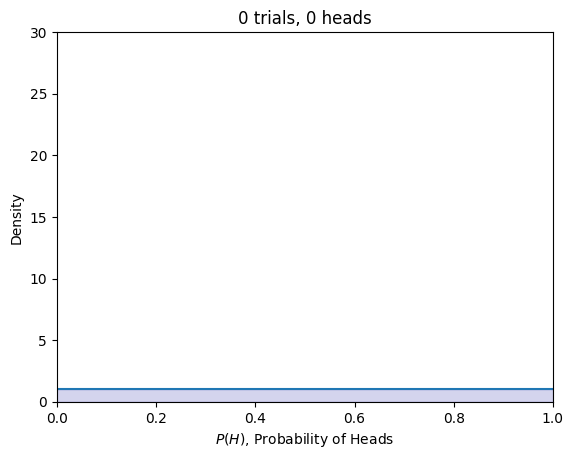

In [9]:
plot_coin_toss(0, data)

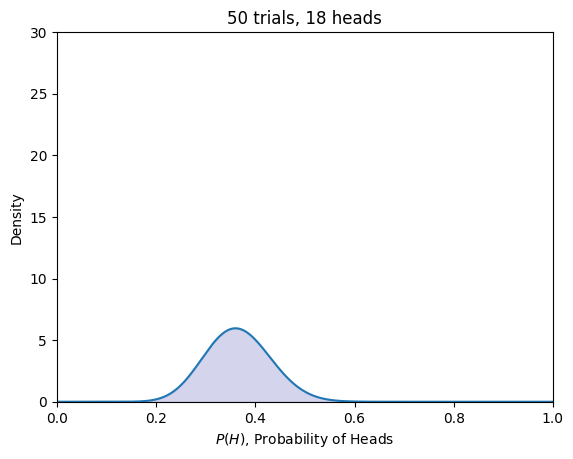

In [11]:
plot_coin_toss(50, data)

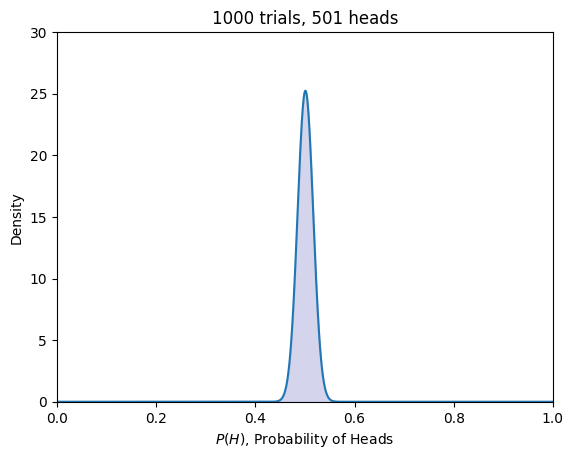

In [10]:
plot_coin_toss(1000, data)

### 4. (Optional) Animate coin toss

In [12]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt, random

def interactive_plot(n_trials, p):
    data = stats.bernoulli.rvs(p, size=2000)
    plot_coin_toss(n_trials, data)
    return

In [13]:
interact(interactive_plot, n_trials=(1,2000, 10), p=(0., 1., 0.05));

interactive(children=(IntSlider(value=991, description='n_trials', max=2000, min=1, step=10), FloatSlider(valu…

### Priors

- Encode assumptions
- Priors as regularizers
- How to choose a prior?